<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DataAnalysis/blob/main/03.%ED%86%B5%EA%B3%84%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch03_02_%EC%97%AC%EB%9F%AC%EA%B0%80%EC%A7%80_%ED%99%95%EB%A5%A0%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.02. 여러가지 확률 분포
---
* 날짜:
* 이름:

## 학습내용
    * 연속형 확률변수 -> 확률 밀도 함수 -> 연속형 확률 분포
      - 균등 분포
      - 정규 분포
      - 지수 분포
      - 감마 분포
      - 베타 분포
      - 카이제곱 분포
    * 이산형 확률변수 -> 확률 질량 함수 -> 이산형 확률 분포
      - 베르누이 분포
      - 이항분포
      - 카테고리 확률 분포
      - 포아송 분포
      - 기하 분포
      - 음이항 분포
      - 초기하 분포


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy.stats import * # 모든 함수 임포트

## 연속형 확률 분포
---



### **| 정규분포**

\begin{align}
\mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)
\end{align}

```
sp.stats.norm(mu, std)
```

In [ ]:
# 위 식 x는 input ; 뒤에는 parameters
mu, std = 0, 1 # 표준 정규분포/ mu 평균
norm = sp.stats.norm(mu, std) # 확률함수

* 확률 분포


In [ ]:
X = np.linspace(-5,5,10)  # -5 부터 5까지 10개
P_X = norm.pdf(X)
print(P_X)

[1.48671951e-06 2.07440309e-04 8.42153448e-03 9.94771388e-02
 3.41892294e-01 3.41892294e-01 9.94771388e-02 8.42153448e-03
 2.07440309e-04 1.48671951e-06]


* 누적 확률 분포


In [ ]:
F_X = norm.cdf(X)
print(F_X)

[2.86651572e-07 5.03521029e-05 2.73660179e-03 4.77903523e-02
 2.89257361e-01 7.10742639e-01 9.52209648e-01 9.97263398e-01
 9.99949648e-01 9.99999713e-01]


* 표본 추출



(array([ 1.,  5.,  7., 13., 17., 18., 16., 11.,  7.,  5.]),
 array([1.44701018, 1.92928463, 2.41155907, 2.89383352, 3.37610796,
        3.8583824 , 4.34065685, 4.82293129, 5.30520574, 5.78748018,
        6.26975462]),
 <a list of 10 Patch objects>)

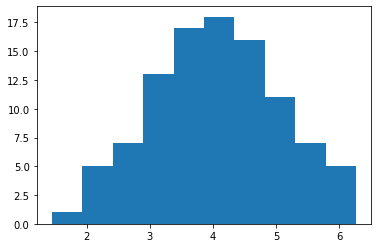

In [ ]:
rvs = norm.rvs(100, random_state = 0)
rvs
plt.hist(rvs)

#### **예제 01. 파라미터 변경-평균**

* 표준편차 `1`, 평균이 각각 `0.5, 1, 2, 4`인 확률분포와 확률누적분포를 그리세요.

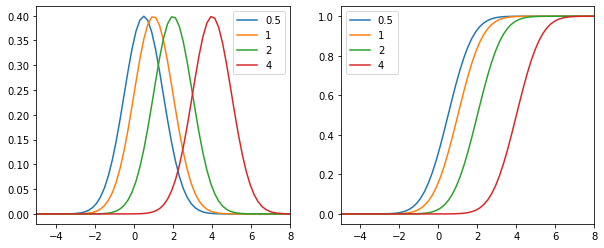

In [ ]:
mus = [0.5, 1, 2, 4]
std = 1
X = np.linspace(-10, 10, 100)



fig, axes = plt.subplots(1,2, figsize = (10,4))
#axes = axes.flatten()
for mu in mus:
    norm = sp.stats.norm(mu, std)
    P_X = norm.pdf(X) # 확률 밀도 함수
    F_X = norm.cdf(X) # 누적 확률 함수
    axes[0].plot(X, P_X) # X에 대한 확률 값 그래프
    axes[1].plot(X, F_X) # X에 대한 누적 값 그래프
    axes[0].set_xlim(-5, 8) # x 범위 조절
    axes[1].set_xlim(-5, 8)
axes[0].legend(mus) # 라벨
axes[1].legend(mus) # 라벨

#### **예제 02. 파라미터 변경-표준편차**

* 평균 `0`, 표준편차가 각각 `0.5, 1, 2, 4`인 확률분포와 확률누적분포를 그리세요.

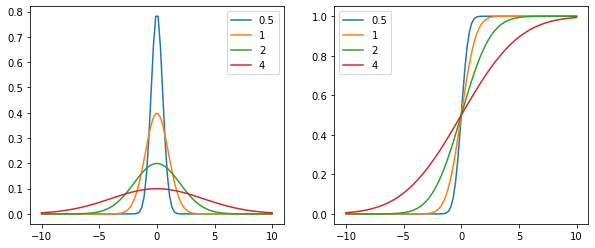

In [ ]:
mu = 0
std = [0.5, 1, 2, 4]

fig, axes = plt.subplots(1,2, figsize = (10,4))
for s in std:
    norm = sp.stats.norm(mu, s)
    P_X = norm.pdf(X)
    F_X = norm.cdf(X)
    axes[0].plot(X, P_X)
    axes[1].plot(X, F_X)
axes[0].legend(std)
axes[1].legend(std)


#### **예제 03. 손의 길이**

성인 손의 길이의 평균은 15.2cm 이고 표준편차는 2.5cm를 따른다고 합니다. 1000명을 표본으로 뽑고 히스토 그램을 그리세요.

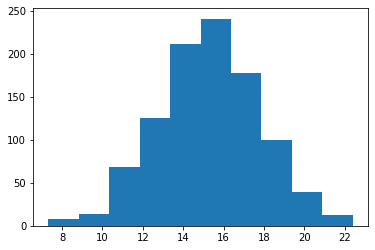

In [ ]:
mu = 15.2
std = 2.5

norm = sp.stats.norm(mu, std)
X = norm.rvs(1000)
_ = plt.hist(X)

### **| 카이제곱 분포**

\begin{align}
\chi^2(x; \nu) = \frac{x^{(\nu/2-1)} e^{-x/2}}{2^{\nu/2} \Gamma\left(\frac{\nu}{2}\right)}
\end{align}

```
sp.stats.chi2(df=df)
```

In [ ]:
chi2 = sp.stats.chi2(df = 1) 

* 확률 분포


In [ ]:
X = np.linspace(-0.01,5,10) # 카이 제곱 분포 특성 때문
P_X = chi2.pdf(X)

* 누적 확률 분포


In [ ]:
F_X = chi2.cdf(X)

* 표본 추출


(array([19., 22., 12., 19., 12.,  5.,  4.,  2.,  4.,  1.]),
 array([ 0.13196454,  1.44869516,  2.76542578,  4.0821564 ,  5.39888702,
         6.71561764,  8.03234826,  9.34907887, 10.66580949, 11.98254011,
        13.29927073]),
 <a list of 10 Patch objects>)

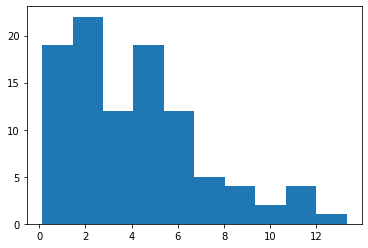

In [ ]:
rvs = chi2.rvs(100, random_state = 0)
plt.hist(rvs)

#### **예제 01. 파라미터 변경-자유도**

* 자유도(df) 값이 각각 `1,2,3,4`인 카이제곱분포와 누적 확률 분포를 그리세요.

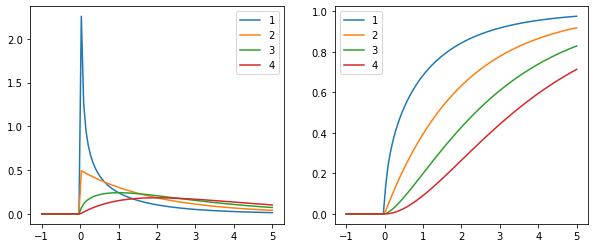

In [ ]:
df = [1,2,3,4]
X = np.linspace(-1,5,100)

fig, axes = plt.subplots(1,2, figsize = (10, 4))
for d in df:
    chi2 = sp.stats.chi2(d)
    P_X = chi2.pdf(X)
    F_X = chi2.cdf(X)
    axes[0].plot(X, P_X)
    axes[1].plot(X, F_X)

_ = axes[0].legend(df)
_ = axes[1].legend(df)

### **| 감마분포**

\begin{align}
\text{Gam}(x;a,b) = \frac{1}{\Gamma(a)} b^a x^{a-1}e^{-bx}
\end{align}

```
sp.stats.gamma(a=a, b=1)
```

In [ ]:
a,b = 1,6
gamma = sp.stats.gamma(a,b) # gamma = sp.stats.gamma(a = 5) 이렇게 하면 b = 1로 고정.

X = np.linspace(-5,5,100)

* 확률 분포

In [ ]:
P_X = gamma.pdf(X)

* 누적 확률 분포


In [ ]:
F_X = gamma.cdf(X)

* 표본 추출

(array([38., 24., 17.,  8.,  4.,  2.,  2.,  1.,  3.,  1.]),
 array([ 6.00470653,  6.44968562,  6.8946647 ,  7.33964379,  7.78462287,
         8.22960196,  8.67458104,  9.11956013,  9.56453921, 10.0095183 ,
        10.45449738]),
 <a list of 10 Patch objects>)

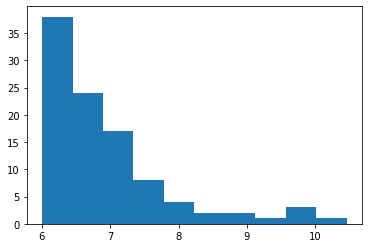

In [ ]:
rvs = gamma.rvs(100, random_state = 0)
plt.hist(rvs)

#### **예제 01. 파라미터 변경-a**

* a 값이 각각 `1,2,4,8`인 감마 분포와 누적 확률 분포를 그리세요.

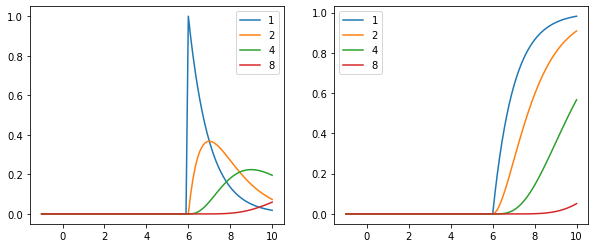

In [ ]:
a = [1,2,4,8]
X = np.linspace(-1,10, 100)

fig, axes = plt.subplots(1,2, figsize = (10,4))

for a_ in a:
    gamma = sp.stats.gamma(a_,b)
    axes[0].plot(X, gamma.pdf(X))
    axes[1].plot(X, gamma.cdf(X))

axes[0].legend(a)
axes[1].legend(a)


### **| 균등분포**

(array([13., 12.,  9.,  7., 10., 11., 14.,  7.,  7., 10.]),
 array([0.00469548, 0.10306331, 0.20143115, 0.29979898, 0.39816682,
        0.49653466, 0.59490249, 0.69327033, 0.79163817, 0.890006  ,
        0.98837384]),
 <a list of 10 Patch objects>)

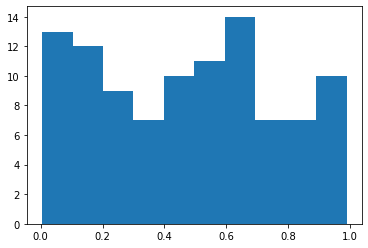

In [ ]:
uniform = sp.stats.uniform()
X = np.linspace(-1,2,100)
P_X = uniform.pdf(X)
F_X = uniform.cdf(X)

rvs = uniform.rvs(100, random_state = 0)
plt.hist(rvs)

(array([13., 12.,  9.,  7., 10., 11., 14.,  7.,  7., 10.]),
 array([-0.9812181 , -0.58774675, -0.19427541,  0.19919594,  0.59266728,
         0.98613863,  1.37960997,  1.77308132,  2.16655266,  2.56002401,
         2.95349535]),
 <a list of 10 Patch objects>)

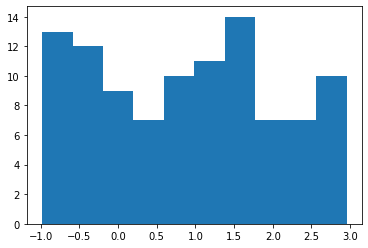

In [ ]:
uniform = sp.stats.uniform(-1,4) # [loc, loc + scale]
rvs = uniform.rvs(100, random_state = 0)
plt.hist(rvs)

### **| 지수분포**

(array([38., 24., 17.,  8.,  4.,  2.,  2.,  1.,  3.,  1.]),
 array([0.00470653, 0.44968562, 0.8946647 , 1.33964379, 1.78462287,
        2.22960196, 2.67458104, 3.11956013, 3.56453921, 4.0095183 ,
        4.45449738]),
 <a list of 10 Patch objects>)

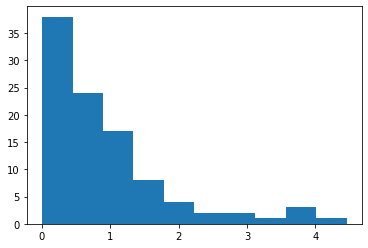

In [ ]:
expon = sp.stats.expon()

rvs = expon.rvs(100, random_state = 0)
plt.hist(rvs)

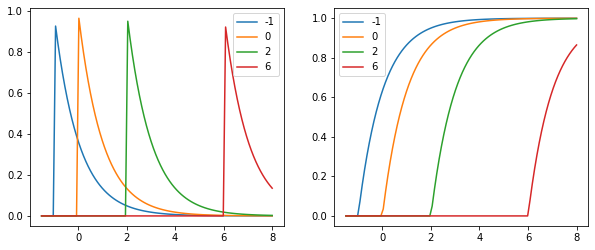

In [ ]:
a = [-1,0,2,6]
X = np.linspace(-1.5 ,8, 100)

fig, axes = plt.subplots(1, 2, figsize = (10,4))

for i in a:
    expon = sp.stats.expon(i)
    axes[0].plot(X, expon.pdf(X))
    axes[1].plot(X, expon.cdf(X))
axes[0].legend(a)
axes[1].legend(a)

### **| 베타분포**

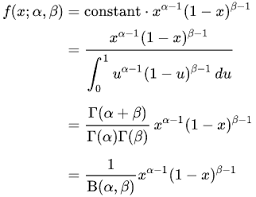

for 0 <= x <=1, a > 0, b > 0

(array([10., 10.,  3.,  7., 12.,  5., 15., 14.,  9., 15.]),
 array([0.01736823, 0.11506815, 0.21276808, 0.310468  , 0.40816792,
        0.50586785, 0.60356777, 0.7012677 , 0.79896762, 0.89666755,
        0.99436747]),
 <a list of 10 Patch objects>)

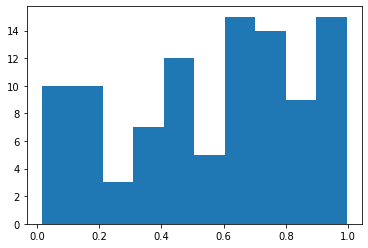

In [ ]:
beta = sp.stats.beta(a = 1, b= 1) #_parse_args() missing 2 required positional arguments: 'a' and 'b'
rvs = beta.rvs(100, random_state = 0)
plt.hist(rvs)

* a = [0.1, 0.6, 2, 4, 8]
* b = 1

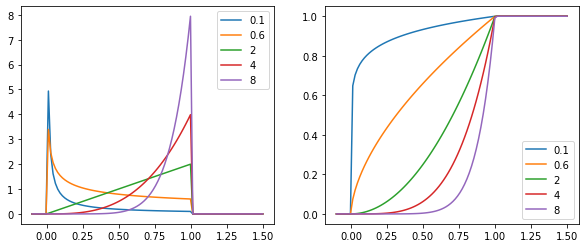

In [ ]:
a = [0.1, 0.6, 2, 4, 8]
b = 1
X = np.linspace(-0.1,1.5,100)

fig, axes = plt.subplots(1,2, figsize = (10,4))

for i in a:
    beta = sp.stats.beta(i, b)
    axes[0].plot(X, beta.pdf(X))
    axes[1].plot(X, beta.cdf(X))

axes[0].legend(a)
axes[1].legend(a)

* a = 1
* b = [0.1, 0.6, 2, 4, 8]

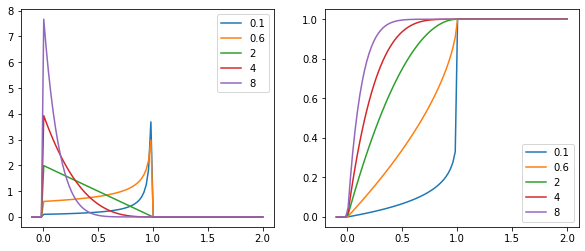

In [ ]:
a = 1
b  = [0.1, 0.6, 2, 4, 8]
X = np.linspace(-0.1, 2, 100)

fig, axes = plt.subplots(1,2, figsize = (10,4))

for j in b:
    beta = sp.stats.beta(a, j)
    axes[0].plot(X, beta.pdf(X))
    axes[1].plot(X, beta.cdf(X))

axes[0].legend(b)
axes[1].legend(b)

## 이산형 확률 분포
---

### |  **베르누이 분포**

\begin{split}
\begin{align}
\text{Bern}(x;\mu) = 
\begin{cases} 
\mu   & \text{if }x=1, \\
1-\mu & \text{if }x=0
\end{cases}
\end{align}
\end{split}

* 기본사용

```
mu = 0.5
rv = sp.stats.bernoulli(mu)
```

In [ ]:
# 둘 중 하나 성공 or 실패

# 동전던지기 (앞, 뒤)
bern = sp.stats.bernoulli(0.5)

* 확률 분포


In [ ]:
# 확률 반환
bern.pmf([0,1,2])

# 베르누이 함수는 x가 0과 1일 때만 확률값을 가진다.

array([0.5, 0.5, 0. ])

* 누적 확률 분포


In [ ]:
print(bern.cdf([0,1]))
print(bern.cdf([1,0]))

[0.5 1. ]
[1.  0.5]


* 표본 추출

In [ ]:
bern.rvs(20)

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0])

#### **예제 01. 동전 던지기**

동전을 던져서 앞면이 나온 확률



#### **예제 02. 주사위 굴리기**

주사위 던져서 6이 나온 확률


([<matplotlib.axis.XTick at 0x7f06a2fa3350>,
 [Text(0, 0, 'Fail'), Text(0, 0, 'Success')])

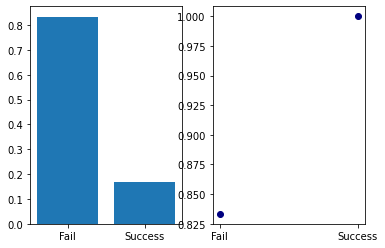

In [ ]:
# 확률 분포 그리고, 누적활률 분포 그리기
mu = 1/6  # 6이 나올 확률 = 1/6
X = [0,1]
label = ['Fail', 'Success']
bern = sp.stats.bernoulli(mu)

# 확률 함수
P = bern.pmf(X)
plt.subplot(1,2,1)
plt.bar(X,P)
plt.xticks(X, labels = label)
# 누적 확률 함수
F = bern.cdf(X)
plt.subplot(1,2,2)
plt.plot(X, F, 'o', color = 'navy')
plt.xticks(X, labels = label)

#### **예제 03. 같은 생일**

두 사람의 생일 월(月)이 같을 확률


([<matplotlib.axis.XTick at 0x7f06a12dead0>,
 [Text(0, 0, 'Success'), Text(0, 0, 'Fail')])

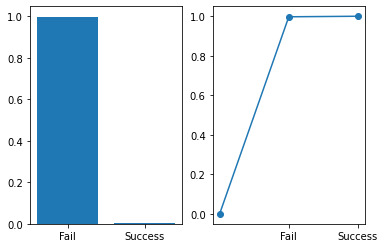

In [ ]:
mu = 1/365
X = [1,0]

bern = sp.stats.bernoulli(mu)

label = ['Success', 'Fail']
plt.subplot(1,2,1)
plt.bar(X, bern.pmf(X))
plt.xticks(X, labels = label)
plt.subplot(1,2,2)
plt.plot([-1, 0, 1], bern.cdf([-1,0,1]), marker = 'o')
plt.xticks(X, labels = label)

#### **예제 04. 주머니 공**
주머니에 5개의 공이 들어있고 3개는 빨강, 2개는 하양이다. 공 2개를 뽑았을 때 색깔이 모두 다를 확률은?

([<matplotlib.axis.XTick at 0x7f06a128a7d0>,
 [Text(0, 0, 'Success'), Text(0, 0, 'Fail')])

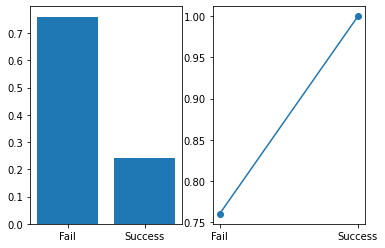

In [ ]:
mu = ((3/5)*(2/5))
X = [1,0]
label = ['Success', 'Fail']
bern = sp.stats.bernoulli(mu)

plt.subplot(1,2,1)
plt.bar(X, bern.pmf(X))
plt.xticks(X, labels = label)
plt.subplot(1,2,2)
plt.plot(X, bern.cdf(X), marker= 'o')
plt.xticks(X, labels = label)

### |  **이항분포**

\begin{align}
\text{Bin}(x;N,\mu) = \binom N x \; \mu^x(1-\mu)^{N-x}
\end{align}


```
sp.stats.binom(N, mu)
```

In [ ]:
# 이항분포: 베르누이 시행을 N번 한 결과의 확률 
# 동전 던지기를 10번 시행, 앞면이 나온 확률 
N, mu = 10, 0.5
binom = sp.stats.binom(N, mu)

* 확률 분포


In [ ]:
# X는 앞면이 나오는 횟수 (0, 1, 2, ..., 10)
# P는 각 횟수에 대한 확률 
binom.pmf(np.arange(11))

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507813,
       0.24609375, 0.20507813, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

* 누적 확률  분포

In [ ]:
binom.cdf(np.arange(11))

array([9.76562500e-04, 1.07421875e-02, 5.46875000e-02, 1.71875000e-01,
       3.76953125e-01, 6.23046875e-01, 8.28125000e-01, 9.45312500e-01,
       9.89257812e-01, 9.99023438e-01, 1.00000000e+00])

* 확률 변수 표본 추출


In [ ]:
binom.rvs(100)

array([ 6,  4,  3,  4,  6,  3,  5,  4,  2,  6,  5,  5,  6,  4,  5,  7,  7,
        8,  2,  4,  5,  3,  5,  5,  5,  7,  4,  5,  7,  6,  6,  5,  5,  4,
        7,  4,  5,  6,  3,  4,  2,  5,  4,  3,  5,  5,  2,  4,  5,  3,  5,
        2,  4,  6,  3,  6,  4,  3,  1,  3,  4,  6,  3,  8,  4,  6,  5,  6,
        7,  6,  4,  6,  4,  4,  7, 10,  4,  2,  4,  4,  4,  6,  5,  5,  5,
        5,  7,  4,  6,  6,  3,  4,  7,  7,  5,  6,  4,  4,  4,  4])

#### **예제 01. 동전 던지기**

* 동전을 1번 던졌을 때 앞면이 나온 횟수의 확률분포



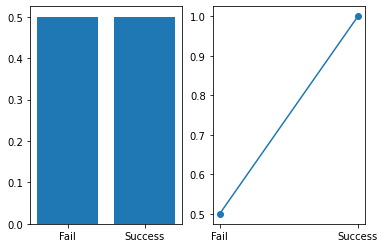

In [ ]:
def plot_bern(mu):
    bern = sp.stats.bernoulli(mu)
    X = [1,0]

    plt.subplot(1,2,1)
    plt.bar(X, bern.pmf(X))
    plt.xticks(X, ['Success', 'Fail'])
    plt.subplot(1,2,2)
    plt.plot(X, bern.cdf(X), marker = 'o')
    plt.xticks(X, ['Success', 'Fail'])
    
    plt.show()

plot_bern(0.5)


* 동전을 10번 던졌을 때 앞면이 나온 횟수의 확률분포


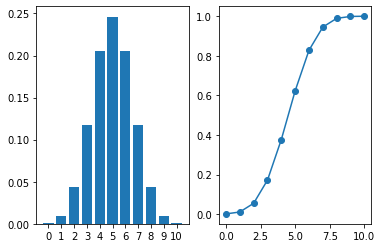

In [ ]:
def plot_binom(N, mu):
    binom = sp.stats.binom(N, mu)
    X = np.arange(N + 1)
    
    plt.subplot(121)
    plt.bar(X, binom.pmf(X))
    plt.xticks(X)

    plt.subplot(122)
    plt.plot(X, binom.cdf(X), marker = 'o')
    plt.show()

N, mu =  10, 0.5
plot_binom(N, mu)

#### **예제 02. 주사위 굴리기**

* 주사위를 1번 던져서 짝수가 나온 횟수의 분포

[1.  0.5]


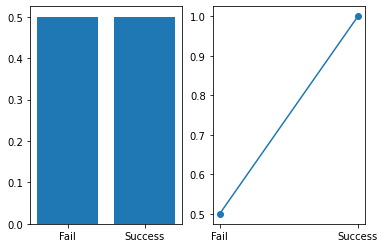

In [ ]:
plot_bern(1/2)

* 주사위를 6번 던져서 짝수가 나온 횟수의 분포

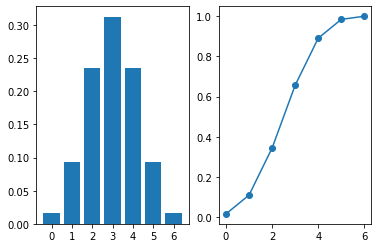

In [ ]:
mu, N = 1/2, 6

plot_binom(N, mu)

* 주사위를 20번 던져서 짝수가 나온 횟수의 분포

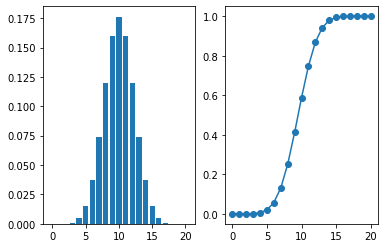

In [ ]:
N, mu = 20, 0.5

plot_binom(N, mu)

* 주사위를 1번 던져서 6이 나온 횟수의 분포

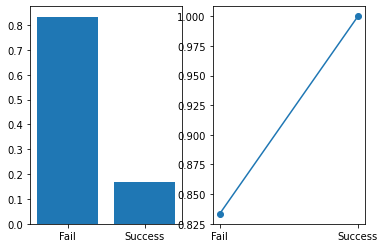

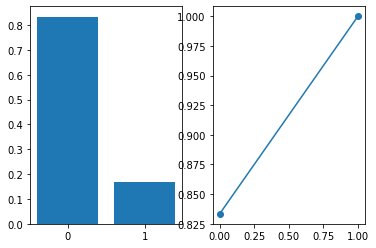

In [ ]:
plot_bern(1/6)
plt.show()
plot_binom(1, 1/6)
plt.show()

* 주사위를 6번 던져서 6이 나온 횟수의 분포

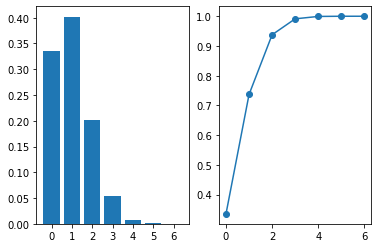

In [ ]:
N, mu = 6, 1/6

plot_binom(N, mu)

* 주사위를 20번 던져서 6이 나온 횟수의 분포

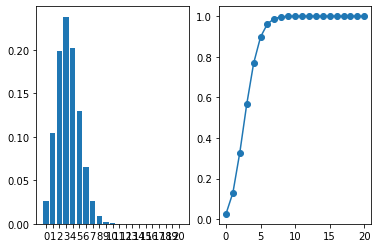

In [ ]:
N, mu = 20, 1/6
plot_binom(N, mu)

### **| 카테고리 확률분포**

\begin{split} 
\begin{align}
\text{Cat}(x;\mu) = 
\begin{cases}
\mu_1 & \text{if } x = (1, 0, 0, \cdots, 0) \\
\mu_2 & \text{if } x = (0, 1, 0, \cdots, 0) \\
\mu_3 & \text{if } x = (0, 0, 1, \cdots, 0) \\
\vdots & \vdots \\
\mu_K & \text{if } x = (0, 0, 0, \cdots, 1) \\
\end{cases}
\end{align}
\end{split}


```
sp.stats.multinomial(1, mu)
```

In [ ]:
# x = (1, 0, 0,..., 0) :원-핫 인코딩
# multinomial(N, mu)
# N : N번 시행 -> 1로 고정 
# mus :클래스 별 확률, 벡터 (리스트, 어레이)

mult = sp.stats.multinomial(1, [1/3, 1/3, 1/3])

* 확률 분포


In [ ]:
# 베르누이 시행 에서
# X = [0,1] -> P(X) = [0.6, 0.4]
# X값이 0일 때, 확률 0.6dlek. 

# 카테고리 시행
# X값이 'A'일 때, 'B'일 때, 'C' 일 때
# 원-핫 인코딩: 각 클래스를 벡터로 표현 
# 'A' = [1,0,0], 'B' = [0,1,0], 'C' = [0,0,1]

print(mult.pmf([0,1,0])) # B가 나올 확률
one_h = [[1,0,0],
         [0,1,0],
         [0,0,1]]
mult.pmf(one_h) 


0.3333333333333333


array([0.33333333, 0.33333333, 0.33333333])

* 표본 추출


In [ ]:
mult.rvs(10)

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

#### **예제 01.공정하지 않은 주사위**

* 주사위의 짝수 면이 나올 확률이 홀수 면이 나올 확률의 2배일 때 확률분포를 그래세요.

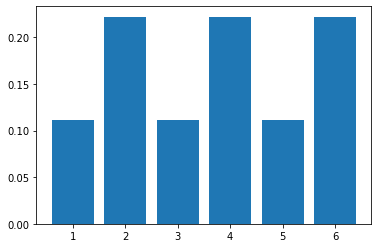

In [ ]:
def plot_multi(cat, mus ,N = 1):
    mul = sp.stats.multinomial(N, mus)
    X = np.eye(len(mus))
    plt.bar(cat, mul.pmf(X))

plot_multi([1,2,3,4,5,6], [1/9, 2/9, 1/9, 2/9, 1/9, 2/9])

#### **예제 02. 주머니 공**

주머니 안에 빨간색 5개, 노란색, 3개 초록색 2개 공이 들어 있을 때 공 한개를 뽑을 때 나오는 색깔의 확률 분포를 그리세요.

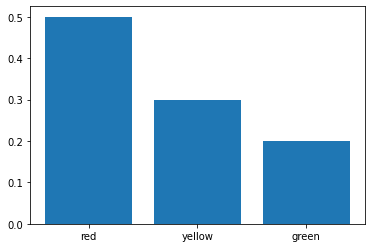

In [ ]:
plot_multi(['red','yellow', 'green'],[5/10, 3/10, 2/10])

# 'multinomial_frozen' object has no attribute 'cdf'

#### **예제 03. 선호 자리**

교실에 5개의 자리가 있고 학생이 x번째 자리에 앉을 확률이 $f(X=x)=\frac{1}{2^{(x+1)}}$ 로 주어졌습니다. 확률 분포를 그리세요.

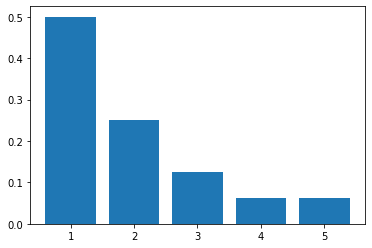

In [ ]:
def P(x):
    x = np.array(x)
    return 1 / (2**(x+1))

plot_multi(np.arange(1,6),P(np.arange(5)))

# plot_multi([0,1,2,3,4,5],list(map(lambda x: 1/2**(x+1), [0,1,2,3,4,5])))
